# Analysis notebook: `SU2020_CRY_onspill-LH_aq`  

## Define analysis name

In [1]:
ana_label = "SU2020_CRY_onspill-LH_aq"

## Preamble

In [2]:
from preamble import *

## Load data

In [3]:
!ls ../../output/results/SU2020_CRY_onspill-LH_aq

cut_flow.csv	events.parquet	info.txt     SU2020_CRY_onspill-LH_aq.log
efficiency.csv	hists.h5	results.pkl  SU2020_CRY_onspill-LH_aq.yaml


In [4]:
loader = Load(
    in_path = f"../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../output/results/SU2020_CRY_onspill-LH_aq


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../output/results/SU2020_CRY_onspill-LH_aq/results.pkl
[Load] ✅ Loaded cut stats from ../../output/results/SU2020_CRY_onspill-LH_aq/cut_flow.csv
[Load] ✅ Loaded histograms from ../../output/results/SU2020_CRY_onspill-LH_aq/hists.h5
[Load] ✅ Loaded efficiency info from ../../output/results/SU2020_CRY_onspill-LH_aq/efficiency.csv
[Load] ✅ Successfully loaded ak.Array from ../../output/results/SU2020_CRY_onspill-LH_aq/events.parquet
[Load] ✅ Loaded info from ../../output/results/SU2020_CRY_onspill-LH_aq/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,2530885,100.000000,100.000000,No selection applied
1,is_reco_electron,2439133,96.374707,96.374707,Electron track fits
2,has_trk_front,2410132,95.228823,98.811012,Tracks intersect tracker entrance
3,good_trkqual,372972,14.736821,15.475169,Track fit quality > 0.8
4,within_t0,303102,11.976127,81.266690,t0 at tracker entrance (640 < t_0 < 1650 ns)
5,is_downstream,217249,8.583914,71.675212,Downstream tracks (p_z > 0 at tracker entrance)
6,has_hits,216495,8.554122,99.652933,>20 active tracker hits
7,within_t0err,201777,7.972587,93.201691,Track fit t0 uncertainty (t0err < 0.9 ns)
8,within_d0,66375,2.622600,32.895226,Distance of closest approach (d_0 < 100 mm)
9,within_pitch_angle,37024,1.462887,55.780038,Extrapolated pitch angle (0.5 < tan(theta_Dip)...


### Histograms

In [7]:
draw = Draw()

# Define image directory
img_dir = f"../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../output/images/SU2020_CRY_onspill-LH_aq/h1o_1x3_mom_windows.png


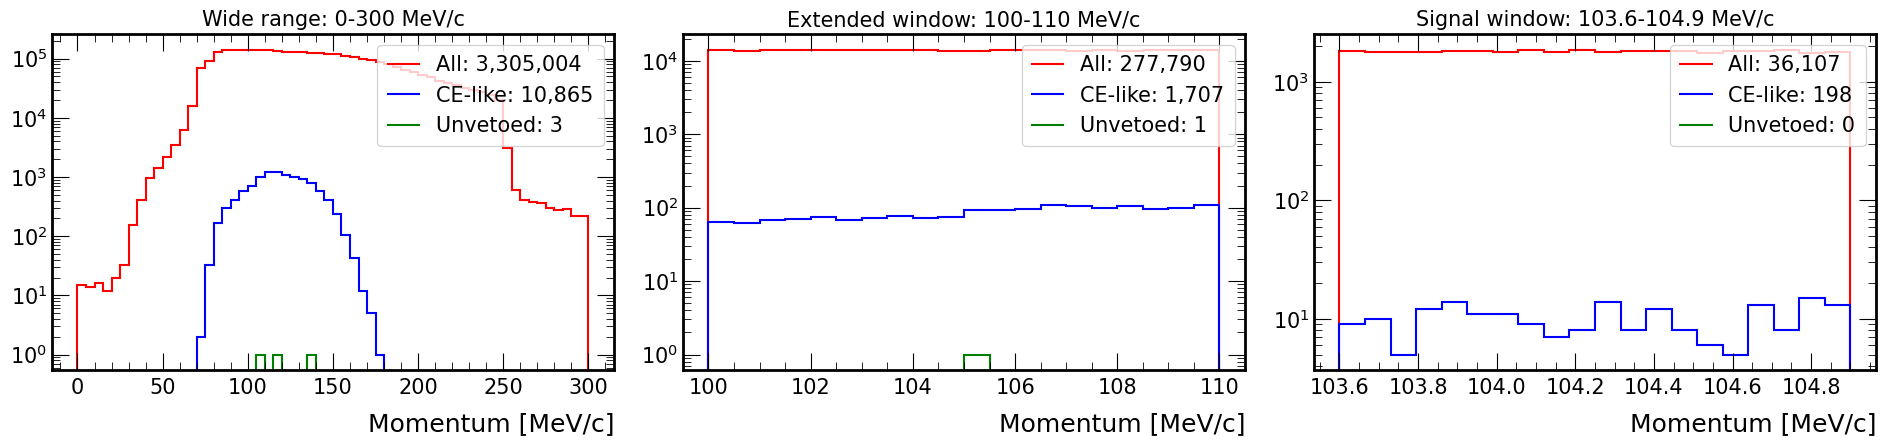

In [8]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../output/images/SU2020_CRY_onspill-LH_aq/h1o_crv_zwindows.png


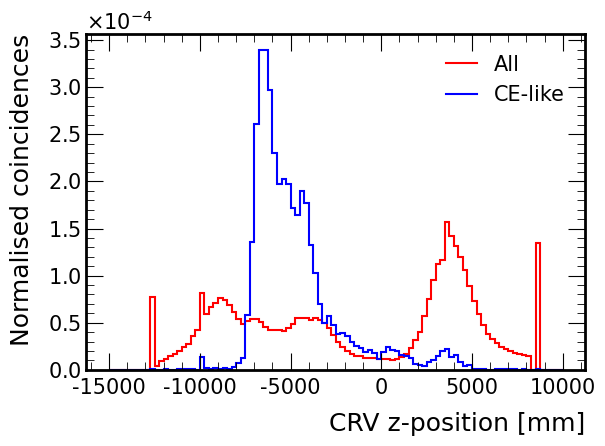

In [9]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_zwindows.png") 

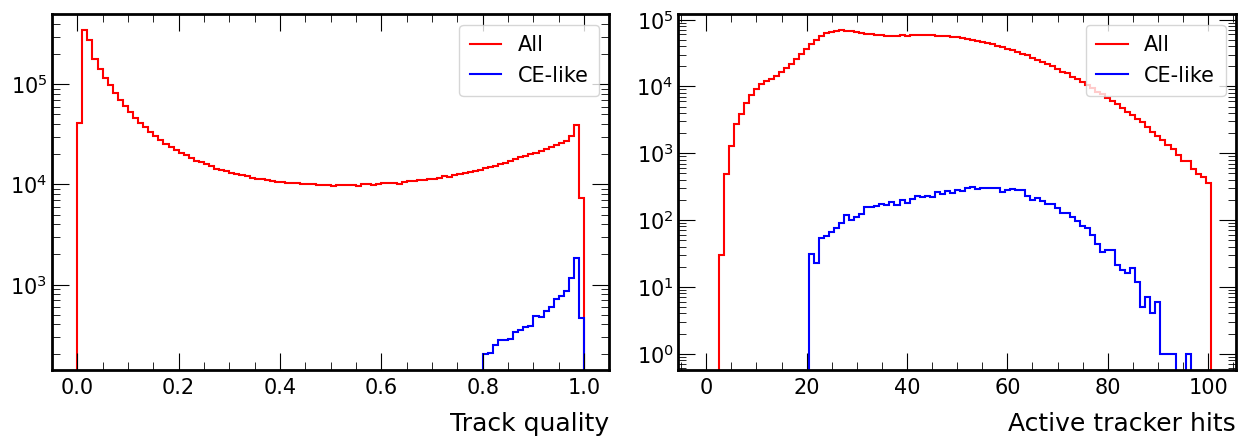

In [10]:
draw.plot_trk_params(results["hists"])

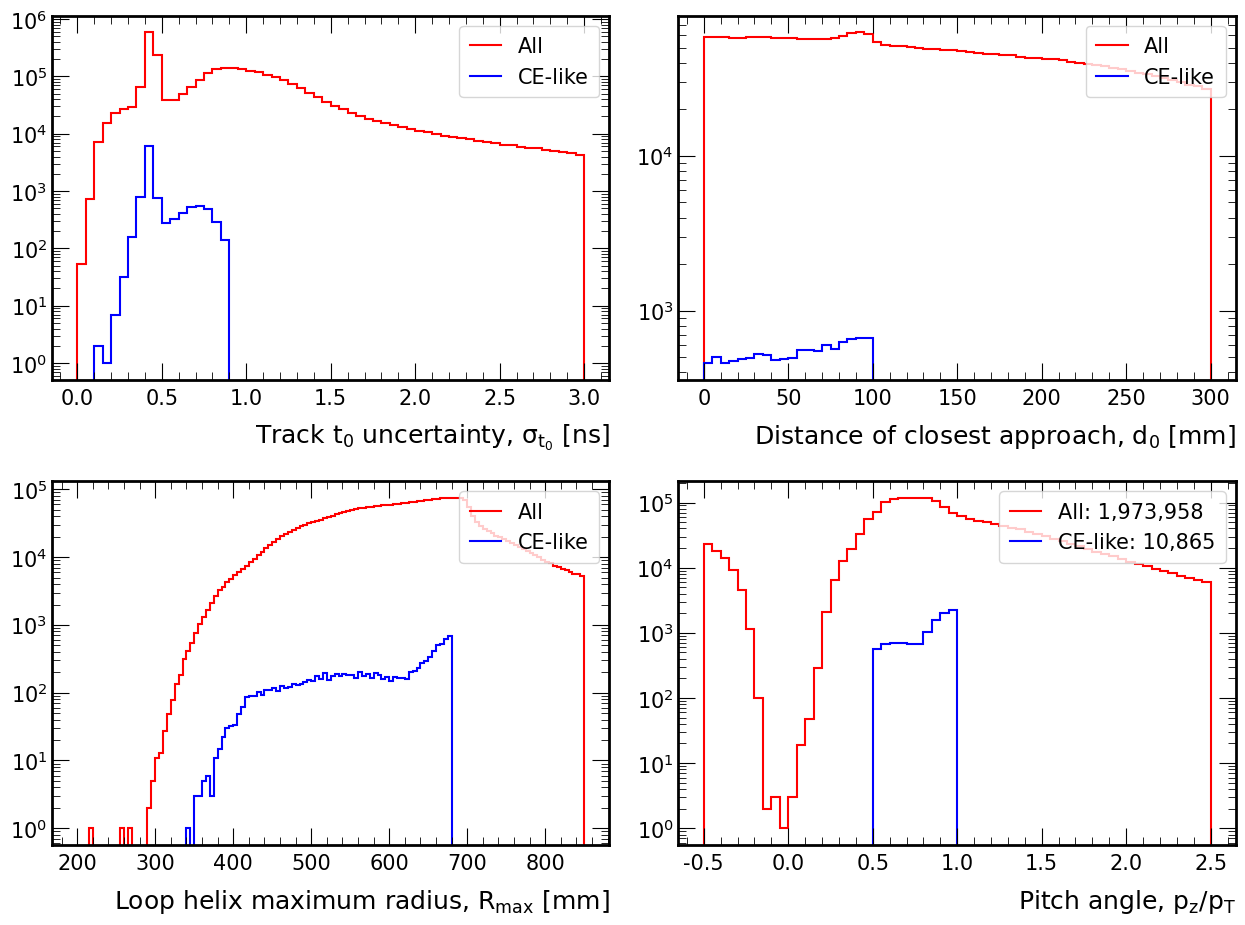

In [11]:
# draw.plot_trkfit_params(results["hists"])
draw.plot_trkfit_params_SU2020(results["hists"])

### Efficiency 

In [12]:
display(results["efficiency"])

,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error [%]
0,Signal (wide),10865,4000000,0.27,0.00
1,Signal (ext),1707,4000000,0.04,0.00
2,Signal (sig),198,4000000,0.00,0.00
3,Veto (wide),3,10865,99.97,0.02
4,Veto (ext),1,1707,99.94,0.07
5,Veto (sig),0,198,100.00,0.25


### Background event info

In [13]:
print(results["event_info"])

  Index:            14
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aq_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  1446.661210
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            217
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aq_best_v1_3_v06_03_00.001202_00015581.root
  Track time [ns]:  822.497897
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            755
  Subrun:           [78889]
  Event:            [161916]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aq_best_v1_3_v06_03_00.001202_00070146.root
  Track time [ns]:  1628.524816
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------


In [14]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 3 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
is_reco_electron: [True, False, False, False]
at_trk_front: [[False, False, False, False, False, True, False, False], ..., [False, ...]]
has_trk_front: [True, True, True, True]
good_trkqual: [True, False, False, False]
within_t0: [True, True, True, True]
is_downstream: [True, False, True, False]
has_hits: [True, True, True, True]
within_t0err: [True, False, True, False]
within_d0: [True, True, True, True]
within_pitch_angle: [True, False, True, False]
within_lhr_max: [True, False, True, False]
within_lhr_max_hi: [True, True, True, True]
is_truth_electron: [True, True, True, True]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
unvetoed